In [1]:
import sys
sys.path.append("../")
from utils.datasets import Datasets
from utils.parametric_qsne import ParametricQSNE
from utils.save_results import save_info, plot_graph, plot_scatter
from utils.utils import dict_to_PCA
from utils.networks import *

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

import numpy as np

In [2]:
SEED = 1
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

DATASET = 'MNIST'
DATASET_DIR = './dataset'
BATCH_SIZE = 5000
NUM_WORKERS = 2

WEIGHT_DECAY = 0.0001
LEARNING_RATE = 0.001
STEPS = 10
GAMMA = 0.9

EPOCH = 100

DIM = 2
PERPLEXITY = 30.0
q = 2.0

In [3]:
torch.cuda.manual_seed_all(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
train_trans = transforms.Compose(
    [
        #transforms.RandomCrop(32, padding=4),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize((0.485, 0.456, 0.406),
        #                     (0.229, 0.224, 0.225)),
    ],
)
test_trans = transforms.Compose(
    [
        transforms.ToTensor(),
        #transforms.Normalize((0.485, 0.456, 0.406),
        #                     (0.229, 0.224, 0.225)),
    ],
)
instance_datasets = Datasets(
    DATASET,
    BATCH_SIZE,
    NUM_WORKERS,
    transform=train_trans,
    test_transform=test_trans,
    dataset_dir=DATASET_DIR,
)
data_sets = instance_datasets.create()

trainloader = data_sets[0]
testloader = data_sets[1]
classes = data_sets[2]
based_labels = data_sets[3]
input_channels = data_sets[4]
trainset = data_sets[5]
testset = data_sets[6]

Dataset : MNIST
set train data
set test data


In [5]:
model = Net(
    input_channels=input_channels,
    num_classes=DIM,
).to(device)

optimizer = optim.SGD(
    model.parameters(),
    lr=LEARNING_RATE,
    momentum=0.9,
    weight_decay=WEIGHT_DECAY,
)
optimizer = optim.Adam(
    model.parameters(),
    lr=LEARNING_RATE,
)

scheduler = optim.lr_scheduler.StepLR(
    optimizer,
    step_size=STEPS,
    gamma=GAMMA,
)
scheduler = None

criterion = nn.KLDivLoss(reduction="sum")

pqsne = ParametricQSNE(
    model,
    optimizer,
    criterion,
    q,
    PERPLEXITY,
)

In [6]:
losses = pqsne.fit(
    EPOCH,
    trainloader,
    scheduler=scheduler,
    device=device,
)

epoch1


100%|██████████| 12/12 [01:47<00:00,  9.00s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:48<00:00,  9.03s/it]


mean_loss=4.321321884791057
epoch2


100%|██████████| 12/12 [01:47<00:00,  8.97s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.90s/it]


mean_loss=3.419500192006429
epoch3


100%|██████████| 12/12 [01:46<00:00,  8.91s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.90s/it]


mean_loss=3.0499396522839866
epoch4


100%|██████████| 12/12 [01:46<00:00,  8.90s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.89s/it]


mean_loss=2.8972532947858176
epoch5


100%|██████████| 12/12 [01:47<00:00,  9.00s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:48<00:00,  9.00s/it]


mean_loss=2.795050938924154
epoch6


100%|██████████| 12/12 [01:47<00:00,  8.96s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:48<00:00,  9.01s/it]


mean_loss=2.7167307337125144
epoch7


100%|██████████| 12/12 [01:47<00:00,  8.97s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.97s/it]


mean_loss=2.6608890096346536
epoch8


100%|██████████| 12/12 [01:47<00:00,  8.99s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.97s/it]


mean_loss=2.6141767700513205
epoch9


100%|██████████| 12/12 [01:47<00:00,  9.00s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.98s/it]


mean_loss=2.5704161326090493
epoch10


100%|██████████| 12/12 [01:48<00:00,  9.02s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:48<00:00,  9.01s/it]


mean_loss=2.5369952917099
epoch11


100%|██████████| 12/12 [01:48<00:00,  9.01s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:48<00:00,  9.05s/it]


mean_loss=2.5072430968284607
epoch12


100%|██████████| 12/12 [01:48<00:00,  9.05s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:48<00:00,  9.03s/it]


mean_loss=2.479940672715505
epoch13


100%|██████████| 12/12 [01:47<00:00,  8.92s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.97s/it]


mean_loss=2.4567304054896035
epoch14


100%|██████████| 12/12 [01:47<00:00,  8.98s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.98s/it]


mean_loss=2.436859448750814
epoch15


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.422944406668345
epoch16


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.4040188590685525
epoch17


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.388416846593221
epoch18


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.376661201318105
epoch19


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:45<00:00,  8.83s/it]


mean_loss=2.358110785484314
epoch20


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.348810374736786
epoch21


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.341491997241974
epoch22


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.332614024480184
epoch23


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.315996785958608
epoch24


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.3143441478411355
epoch25


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.300171673297882
epoch26


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.291304628054301
epoch27


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.287177880605062
epoch28


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.2824396888415017
epoch29


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.271308422088623
epoch30


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.2683173418045044
epoch31


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.2597179214159646
epoch32


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.2534780502319336
epoch33


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.245190978050232
epoch34


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.2402990659077964
epoch35


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.237508396307627
epoch36


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.2332672675450644
epoch37


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.224539816379547
epoch38


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.226228574911753
epoch39


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.2152337630589805
epoch40


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.2115589380264282
epoch41


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.205410281817118
epoch42


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.2002075910568237
epoch43


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.1979223092397056
epoch44


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.193272352218628
epoch45


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.1929112672805786
epoch46


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.195750594139099
epoch47


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.1843537290891013
epoch48


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.1798035303751626
epoch49


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.1728934248288474
epoch50


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.173287113507589
epoch51


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.17032927274704
epoch52


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.84s/it]


mean_loss=2.168387989203135
epoch53


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.159108658631643
epoch54


100%|██████████| 12/12 [01:46<00:00,  8.90s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.95s/it]


mean_loss=2.154427190621694
epoch55


100%|██████████| 12/12 [01:47<00:00,  8.95s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.97s/it]


mean_loss=2.153593381245931
epoch56


100%|██████████| 12/12 [01:47<00:00,  8.99s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.90s/it]


mean_loss=2.1486693223317466
epoch57


100%|██████████| 12/12 [01:46<00:00,  8.91s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.90s/it]


mean_loss=2.1509830156962075
epoch58


100%|██████████| 12/12 [01:47<00:00,  8.95s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.96s/it]


mean_loss=2.1494374871253967
epoch59


100%|██████████| 12/12 [01:47<00:00,  8.95s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.94s/it]


mean_loss=2.143431822458903
epoch60


100%|██████████| 12/12 [01:47<00:00,  8.99s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.98s/it]


mean_loss=2.140360335508982
epoch61


100%|██████████| 12/12 [01:48<00:00,  9.01s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:48<00:00,  9.04s/it]


mean_loss=2.1406636238098145
epoch62


100%|██████████| 12/12 [01:48<00:00,  9.01s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.95s/it]


mean_loss=2.1325464049975076
epoch63


100%|██████████| 12/12 [01:47<00:00,  8.97s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.95s/it]


mean_loss=2.1331536173820496
epoch64


100%|██████████| 12/12 [01:47<00:00,  8.96s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  9.00s/it]


mean_loss=2.1301088531812034
epoch65


100%|██████████| 12/12 [01:48<00:00,  9.02s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.89s/it]


mean_loss=2.1273914178212485
epoch66


100%|██████████| 12/12 [01:47<00:00,  8.99s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:48<00:00,  9.01s/it]


mean_loss=2.12608003616333
epoch67


100%|██████████| 12/12 [01:48<00:00,  9.00s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.96s/it]


mean_loss=2.1234591007232666
epoch68


100%|██████████| 12/12 [01:47<00:00,  9.00s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:48<00:00,  9.01s/it]


mean_loss=2.1240299542744956
epoch69


100%|██████████| 12/12 [01:47<00:00,  8.95s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.92s/it]


mean_loss=2.1153825918833413
epoch70


100%|██████████| 12/12 [01:47<00:00,  8.96s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.98s/it]


mean_loss=2.1213998397191367
epoch71


100%|██████████| 12/12 [01:48<00:00,  9.02s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.99s/it]


mean_loss=2.111929694811503
epoch72


100%|██████████| 12/12 [01:47<00:00,  8.96s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.95s/it]


mean_loss=2.1155248284339905
epoch73


100%|██████████| 12/12 [01:47<00:00,  8.98s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:48<00:00,  9.05s/it]


mean_loss=2.1093296011288962
epoch74


100%|██████████| 12/12 [01:48<00:00,  9.02s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.95s/it]


mean_loss=2.1098594069480896
epoch75


100%|██████████| 12/12 [01:47<00:00,  8.96s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.96s/it]


mean_loss=2.1055038571357727
epoch76


100%|██████████| 12/12 [01:47<00:00,  8.96s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  8.95s/it]


mean_loss=2.103343586126963
epoch77


100%|██████████| 12/12 [01:47<00:00,  8.95s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:47<00:00,  9.00s/it]


mean_loss=2.099849760532379
epoch78


100%|██████████| 12/12 [01:48<00:00,  9.01s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.91s/it]


mean_loss=2.1001819372177124
epoch79


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.096694747606913
epoch80


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.0916634599367776
epoch81


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.093342979749044
epoch82


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.0874560674031577
epoch83


100%|██████████| 12/12 [01:46<00:00,  8.87s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.0871712962786355
epoch84


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.0894575913747153
epoch85


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.088943660259247
epoch86


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.87s/it]


mean_loss=2.081974983215332
epoch87


100%|██████████| 12/12 [01:46<00:00,  8.87s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.0892867843310037
epoch88


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.088067571322123
epoch89


100%|██████████| 12/12 [01:46<00:00,  8.89s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.0814064741134644
epoch90


100%|██████████| 12/12 [01:46<00:00,  8.87s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.075275103251139
epoch91


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.075495441754659
epoch92


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.0764509240786233
epoch93


100%|██████████| 12/12 [01:46<00:00,  8.87s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.0737494230270386
epoch94


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.073882579803467
epoch95


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.87s/it]


mean_loss=2.069026986757914
epoch96


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.87s/it]


mean_loss=2.0684714317321777
epoch97


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.86s/it]


mean_loss=2.0667524337768555
epoch98


100%|██████████| 12/12 [01:46<00:00,  8.87s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.87s/it]


mean_loss=2.0648014545440674
epoch99


100%|██████████| 12/12 [01:46<00:00,  8.87s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


mean_loss=2.06801837682724
epoch100


100%|██████████| 12/12 [01:46<00:00,  8.85s/it]


Training data results-----------------------------


100%|██████████| 12/12 [01:46<00:00,  8.87s/it]

mean_loss=2.066353460152944


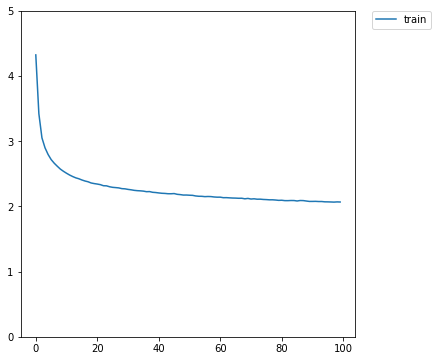

In [14]:
plot_graph(losses, 5.0, filename="loss")

In [8]:
info = {}
info["DATASET"] = DATASET
info["Learnign_rate"] = LEARNING_RATE
info["Weight_decay"] = WEIGHT_DECAY
info["EPOCH"] = EPOCH
info["STEPS"] = STEPS
info["GAMMA"] = GAMMA
info["q"] = q
info["PERPLEXITY"] = PERPLEXITY
info["DIM"] = DIM
info["Model"] = model
info["Criterion"] = criterion
info["Optimizer"] = optimizer
info["train_loss"] = losses["train"][-1]

In [9]:
save_info(info, DATASET+"_info")

In [10]:
torch.save(model.cpu().state_dict(), 'model_param.pth')
torch.save(model.cpu(), 'model.pth')

In [11]:
train_embedding = pqsne.getOutputs(trainloader, based_labels, device)
test_embedding = pqsne.getOutputs(testloader, based_labels, device)

100%|██████████| 2/2 [00:00<00:00,  2.43it/s]


In [12]:
if DIM != 2:
    train_embedding, test_embedding, pca = dict_to_PCA(
        rain_embedding,
        test_embedding,
        dim=2,
    )

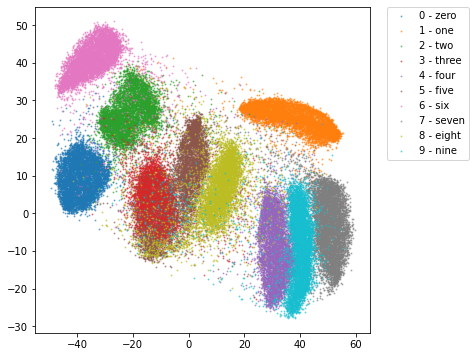

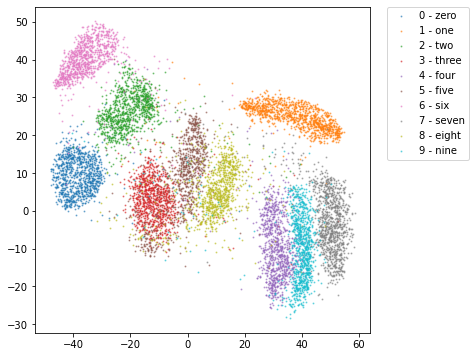

In [13]:
plot_scatter(train_embedding, s=1, filename="train_embeddings")
plot_scatter(test_embedding, s=1, filename="test_embeddings")